Solve fixed point eq: tenorStart=1.0, tenorEnd: 5.0 
current tol: 0.0001, reach: 3.3171555535560504e-05, iter: 6
Error in zero: 0.11229698185245401
adjusted error in zero: 4.996003610813204e-16

Solve fixed point eq: tenorStart=5.0, tenorEnd: 10.0 
current tol: 0.0001, reach: 6.879990298108707e-05, iter: 10
Error in zero: 0.06415869486233344
adjusted error in zero: -2.0050627824730327e-13

Solve fixed point eq: tenorStart=10.0, tenorEnd: 15.0 
current tol: 0.0001, reach: 9.270396405752779e-05, iter: 14
Error in zero: 0.04618678118435521
adjusted error in zero: 1.396660564978447e-13

Solve fixed point eq: tenorStart=15.0, tenorEnd: 20.0 
current tol: 0.0001, reach: 8.742936420325087e-05, iter: 18
Error in zero: 0.03739034494839749
adjusted error in zero: -4.729550084903167e-14



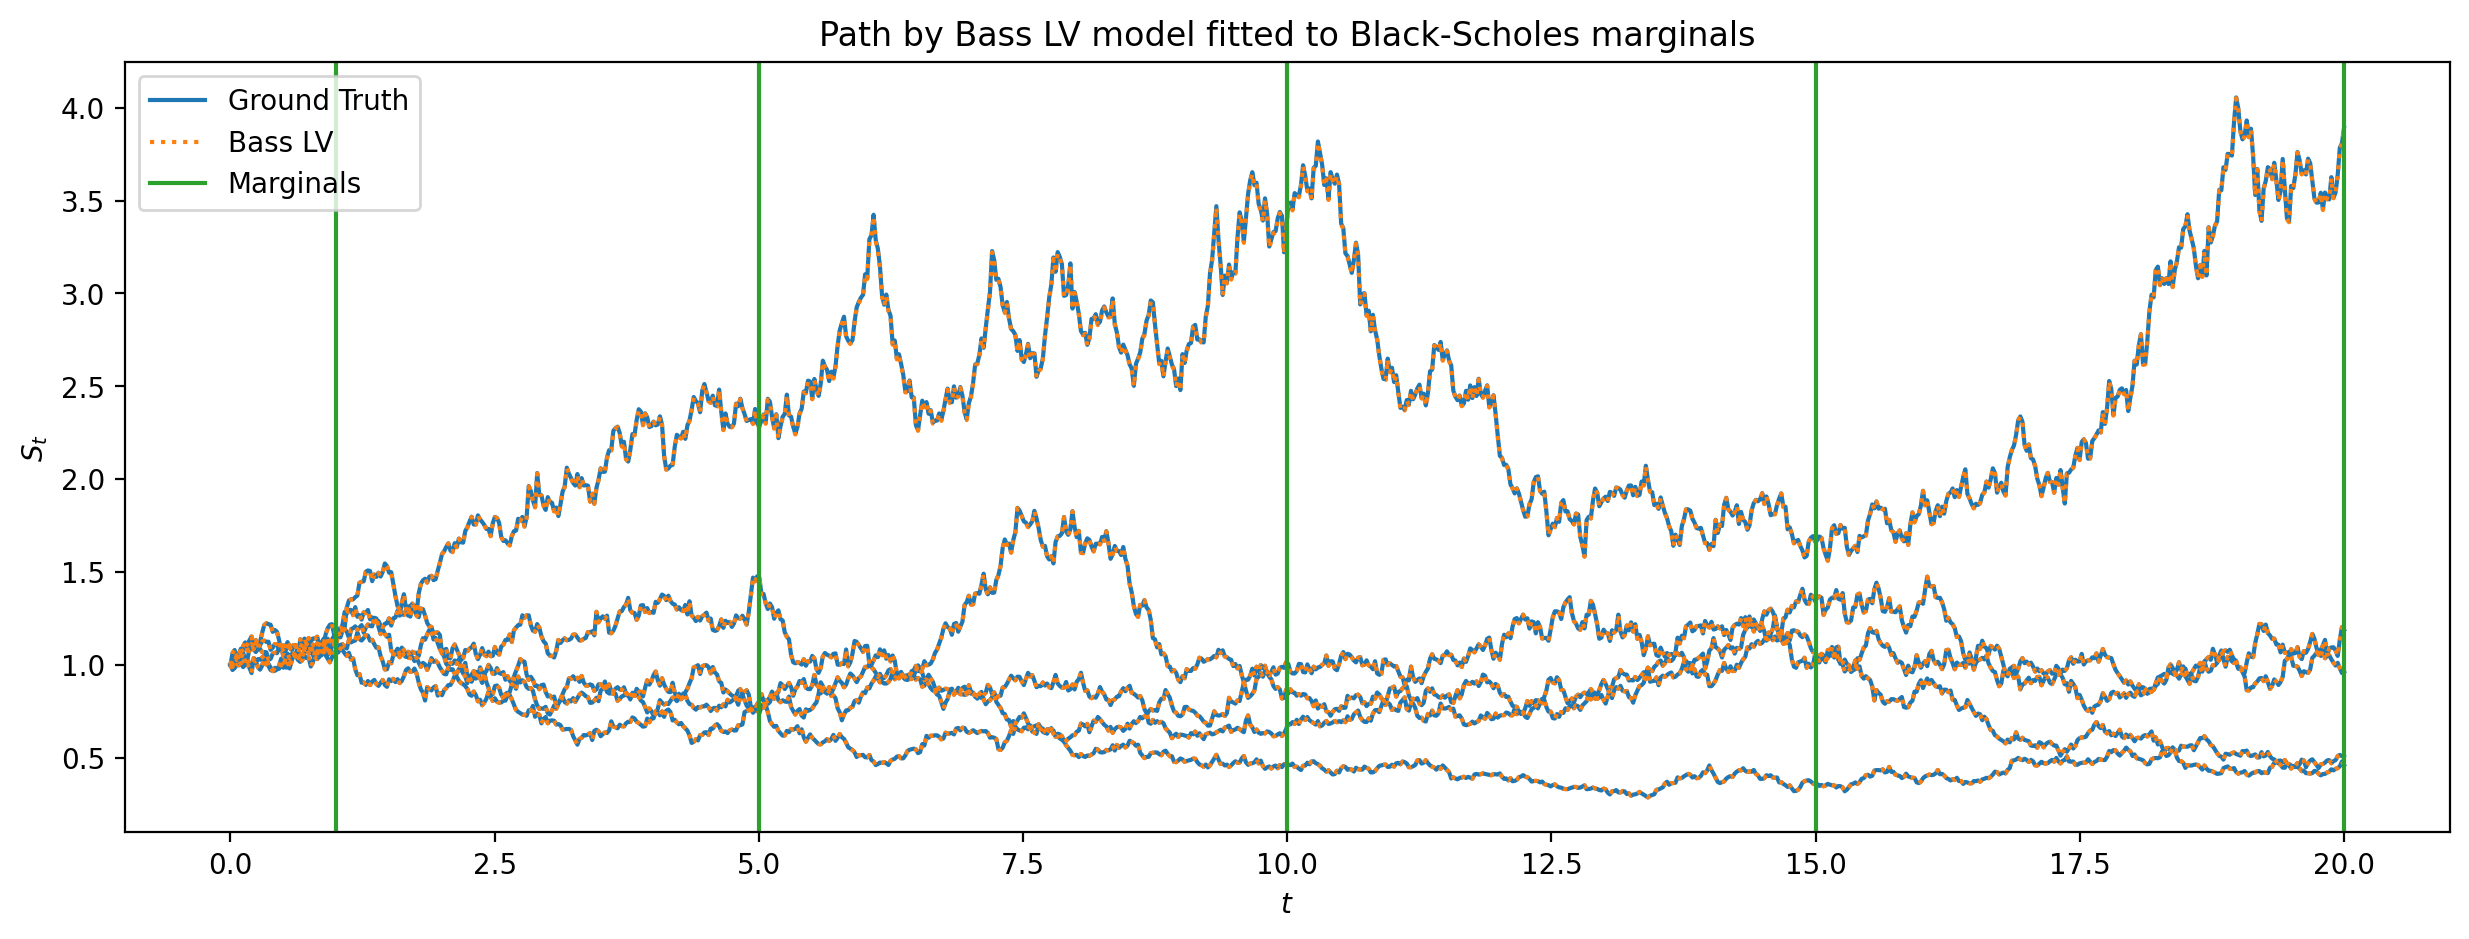

In [1]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.path.dirname(os.path.abspath("")))

from basslv import LogNormalMarginal
from basslv import BassLocalVolatility


if __name__ == '__main__':

    sigma = 0.2
    tenors = [1., 5., 10., 15., 20.]
    timeGridPoints = 1000
    pathsNumber = 5
    SEED = 0xB0BA

    marginals = [LogNormalMarginal(sigma=sigma, tenor=t) for t in tenors]

    t = np.linspace(0, tenors[-1], timeGridPoints)
    randomGenerator = np.random.default_rng(SEED)
    brownianMotion = np.cumsum(
        randomGenerator.normal(
            size=(pathsNumber, timeGridPoints)
        ) * np.sqrt(np.diff(t, prepend=0)),
        axis=1
    )
    pathsGroundTruth = np.exp(sigma * brownianMotion - sigma ** 2 * t / 2)

    pathsBassLv = BassLocalVolatility().sample(
        t=t,
        pathsNumber=pathsNumber,
        marginals=marginals,
        randomGenerator=np.random.default_rng(SEED),
        fixedPointEquationTolerance=1e-4
    )

    _, axis = plt.subplots(figsize=(15, 5), dpi=200)

    handleGroundTruth, *_ = axis.plot(t, pathsGroundTruth.T, c="C0")
    handleBassLv, *_ = axis.plot(t, pathsBassLv.T, ls=":", c="C1")
    for tenor in tenors:
        handleTime = axis.axvline(tenor, c="C2")

    axis.set_xlabel("$t$")
    axis.set_ylabel("$S_t$")
    axis.set_title("Path by Bass LV model fitted to Black-Scholes marginals")
    axis.legend(
        handles=[handleGroundTruth, handleBassLv, handleTime],
        labels=["Ground Truth", "Bass LV", "Marginals"],
    )

    plt.show()
